<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<div class="alert alert-info">
<b>Комментарий студента v1:</b>
<br>Импорт в отдельной ячейке
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<div class="alert alert-info">
<b>Комментарий студента v1:</b>
<br>Установлю параметры для отображения всех колонок
</div>

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

In [6]:
df.duplicated().sum()

0

In [7]:
length_start_df = len(df)
length_start_df

23699

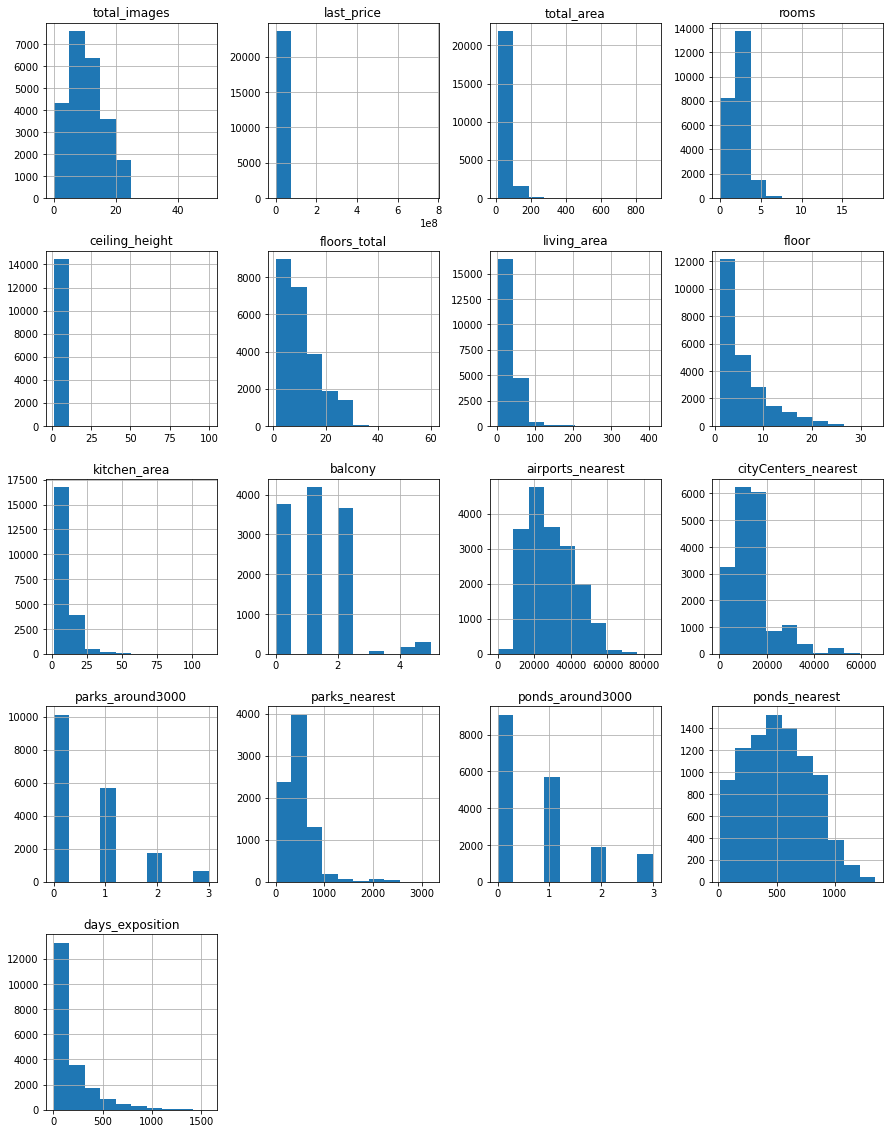

In [8]:
df.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
	
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

<div class="alert alert-info">
<b>Комментарий студента v1:</b>
<br>Что касается наблюдений по гистограммам - заметны выдающиеся значения в категории last_price - недвижимость за 800млн и квартира площадью 900 м2 (причем это не одна и та же квартира, как можно было бы предположить сразу). В столбце rooms заметно, что в некоторых случаях есть квартиры с количеством комнат под 20 штук (19 если быть точнее, а также 16, 15, 14). Здесь также рекордсмен не является самым дорогим в выборке. В столбце ceiling_height видны случаи с высотой потолков больше 10 метров (есть даже 100), во что не очень верится. В графе kitchen_area бросается в глаза показатели в 100м2 (эребор кмк). В остальном каких-либо выделяющихся показателей я не наблюдаю.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

***Небольшой дисклеймер, здесь и далее я буду стараться описывать максимально подробно свой ход мыслей, делаю я это для того чтобы ревьюер: во-первых смог увидеть, в результате каких измышлений появляется тот или иной вывод, и, во-вторых, и это самое главное, объяснил и направил если меня куда-то заносит и так делать как я вообще не надо.***
#### Смотрим на доли незаполенных значений в датасете.
Ниже видно, что наиболее всего в датасете выделяется колонка **is_apartment** - всего ~12% заполненных ячеек от общего количества и, как мне кажется, она (эта колонка) достойна того, чтобы распрощаться с нашим датсетом - есть, конечно, идея, что тут пропуски возникли по причине того, что при подаче объявления явно не указывался этот признак и все пропуски здесь это квартиры, которые апартаментами не являются, но это мои домыслы, слишком много значений пропущено, но удалять эту колонку не буду, просто отмечу для себя, что ее показания для меня бесполезны. Далее колонки связанные с геолокацией - **parks_nearest, ponds_nearest, airports_nearest, cityCenters_nearest, ponds_around3000, parks_around3000** - все пропуски в них связаны, на мой взгляд с отстутвием указания адреса продаваемой недвижимости и по этой причине образовались пропуски (уж сильно похожи показатели пропусков в колонках **parks_around3000, ponds_around3000, cityCenters_nearest, airports_nearest**). Колонка **days_exposition** меня вводит в ступор. Вначале была идея, что объявление о продаже не снято с ресурса, т.е. квартира находится еще в продаже на момент выгрузки, но в колонке **last_price**, судя по описанию, отражены значения цены недвижимости на момент снятия объявления с продажи, и там пропусков нет, поэтому тут я в тупике и оставляю пропуски как есть. В колонке **ceiling_height** здесь пропуски сформировались, как вариант, в результате комбинации событий, когда человек не указывает намеренно эту информации при подаче объявления (разная геометрия потолков, просто незнание этой величины) и ошибки выгрузки данных. Причем вторая причина мне видится главной. Колонки ***floors_total*** и ***locality_name*** - я бы дропнул пропуски в них, очень небольшая потеря данных.

In [9]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [10]:
nan_in_df = df.isna().sum().sort_values(ascending=False)
nan_in_df

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [11]:
#строки с пропусками в locality_name и floors_total убираем.
df = df.dropna(subset=['locality_name', 'floors_total']).reset_index(drop=True)

In [12]:
#проверка на линейную связь между показателями "комнаты" и "жилая площаь"
#ожидаемо эти показатели находятся в сильной прямой линейной зависимости
df['rooms'].corr(df['living_area'])

0.846116853039896

In [13]:
#вот сейчас уже не так уверен, некоторый разброс данных начинается с доведения числа комнат
#до неприличного, но все же обработаю пропуски ниже
df.groupby('rooms', dropna=False)['living_area'].median()

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.650
5      91.785
6     124.400
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

In [14]:
#пропуски в living_area заменяем на медианные 
#значения отдельных групп квартир в соответствии с числом комнат.
for _ in df['rooms'].unique():
    df.loc[(df['rooms'] == _) & (df['living_area'].isna()), \
           'living_area'] = df.loc[df['rooms'] == _, 'living_area'].median() 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

<div class="alert alert-info">
<b>Комментарий студента v1:</b>
<br>Изменю тип данных в int64 и пропуски в balcony заменяем на 0. 
</div>


In [15]:
df['balcony'] = df['balcony'].fillna(0)

In [16]:
df['balcony'] = df['balcony'].astype('int')

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Ещё здесь нужно изменить тип данных в столбце balcony
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

In [17]:
#проверю на теорию, что пропуски в ponds_nearest совмещены либо с пропусками колонки
#ponds_around3000 либо с 0-ми ее значениями. Это позвлит мне сделать предположение о том, что
#пропуски в этих графах сформированы по причине отсутствия водоемов в рассматриваемых случаях и/или,
#отсуствия указание адреса продаваемой недвижимости (невозможно подтянуть данные о геолокации), что
#в свою очередь дает возможность вписать вместо всех пропусков в колонке ponds_around3000 значение 0
#и оставить NaN в ponds_nearest
nan_in_df['ponds_nearest'] == (
    len(df[((df['ponds_around3000'] == 0) |
            (df['ponds_around3000'].isna())) &
           (df['ponds_nearest'].isna())])
)

False

In [18]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [19]:
#по аналогии предыдущего вывода
nan_in_df['parks_nearest'] ==(
    len(df[((df['parks_around3000'] == 0) |
            (df['parks_around3000'].isna())) &
           (df['parks_nearest'].isna())])
)

False

In [20]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [21]:
#пропуски в kitchen_area появились, на мой взгляд, по причине отстуствия кухни как отдельной единицы,
#149 пропусков попали сюда из квартир-студий, остальные, я полагаю, могут быть совмещены с гостиной,
#например. А раз нет кухни, значит и площади ее тоже нет.
df['kitchen_area'] = df['kitchen_area'].fillna(0)

In [22]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20805
parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
days_exposition          3171
kitchen_area                0
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
floor                       0
living_area                 0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа! Не забывай, что не всегда стоит делать замену, ради замены. Очень важно обоснование. Иногда пропуски можно удалить (если их мало), либо вообще не трогать, если у нас нет возможности подобрать аргументированный способ замены
</div>

#### Значения в first_day_exposition преобразую в тип datetime, для возможности проведения  над ними операций операций

In [24]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [26]:
#заменю значения 
for wrong_value in df['ceiling_height'].sort_values().unique():
    if 20 <= wrong_value < 100:
        df['ceiling_height'] =  df['ceiling_height'].replace(wrong_value, wrong_value / 10)
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.26,   2.3 ,
         2.34,   2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,
         2.51,   2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,
         2.59,   2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,
         2.67,   2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,
         2.75,   2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,
         2.83,   2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,
         2.91,   2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,
         2.99,   3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,
         3.07,   3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,
         3.15,   3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,
         3.24,   3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,
         3.32,   3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,
         3.4 ,   3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,
      

####   Совершенно непонятно что делать со значениями потолков равными 6-14 м. Даже высота больше 4.5 метров вызывает большие сомнения. Средняя высота этажа 3.5-4м. Но может быть действительно существуют жилые помещения  с огромной высотой, в данном случае я решил отфильтровать датасет с исключением строк где высота потолка более 6м и менее 2м.

In [27]:
df = df[(df['ceiling_height'].isna()) | (df['ceiling_height'] < 6) & (df['ceiling_height'] > 2)]

In [28]:
df[(df['ceiling_height'].isna()) | (df['ceiling_height'] < 6) & (df['ceiling_height'] > 2)].count()

total_images            23542
last_price              23542
total_area              23542
first_day_exposition    23542
rooms                   23542
ceiling_height          14458
floors_total            23542
living_area             23542
floor                   23542
is_apartment             2757
studio                  23542
open_plan               23542
kitchen_area            23542
balcony                 23542
locality_name           23542
airports_nearest        18028
cityCenters_nearest     18051
parks_around3000        23542
parks_nearest            8022
ponds_around3000        23542
ponds_nearest            9028
days_exposition         20375
dtype: int64

In [29]:
df['living_area'].sort_values(ascending=False).unique()

array([409.7, 409. , 347.5, ...,   5. ,   3. ,   2. ])

#### В столбце living_area аномальными выглядят значения до 5м2 (при площади 139м2 или даже 41м2 слабо видятся зачения жилой площади в 3м2)

In [30]:
df[df['living_area'] < 10][['total_area', 'living_area']].sort_values(by='living_area')

,total_area,living_area
21634,23.00,2.0
13837,52.00,2.0
23442,139.00,3.0
3228,41.00,3.0
17483,22.00,5.0
21818,77.60,5.4
16342,31.00,6.0
19144,33.00,6.5
20877,50.60,8.0
23077,37.00,8.0


In [31]:
df = df[df['living_area'] >= 5]

In [32]:
#в столбце last_price значение 12к выглядит не внушающим доверие, удалю.
df = df[df['last_price'] != df['last_price'].min()].reset_index(drop=True)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай подробнее изучим аномалии в других столбцах. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий студента v1:</b>
<br>Все верно, их я заметил еще до первой отправки на проверку, но не решился их удалять. В жизни бывают разные чудеса и квартира за 800млн или с количеством комнат под 20шт меня не сильно удивили. "У богатых свои причуды" подумалось мне в тот момент. Поделись опытом, отталкиваясь от каких соображений я должен избавляться от такого рода значений из датасета? Потому что по выводу ниже я вижу  в определенной степени странные, но не невероятные данные. 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Давай разберём на примере общей площади (график ниже). На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить.
</div>


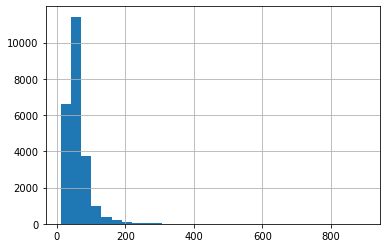

In [33]:
#код ревьюера
df['total_area'].hist(bins=30);

In [34]:
#если чистим датасет по общей площади, тогда имеет смысл его чистить и в колонке с жилой площадью
#иначе будет как-то некрасиво, предположу, что жилой плащади должно быть не больше чем 75% от нежилой
df = (df[(df['total_area'] < 200) & (df['last_price'] < 40000000) & 
    (df['rooms'] < 7) & (df['living_area'] < 150)])

In [35]:
len(df) / length_start_df

0.9784801046457656

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

Потеряли примерно 2.2 процента от первоначальной выборки

In [36]:
#понимаю, выглядит не очень, но мне помогло немного сохранить мое зрение 
a = [i for i in list(df['locality_name'].sort_values().unique()) if " " in i] 
b = [i for i in list(df['locality_name'].sort_values().unique()) if " " not in i]
right_name = []
wrong_name = []
for i in a:
    for j in b:
        if j in i:
            right_name.append(j)
            right_name.append(i)
right_name

['Кудрово',
 'деревня Кудрово',
 'Кингисепп',
 'поселок Кингисеппский',
 'Коммунар',
 'поселок Коммунары',
 'Любань',
 'поселок Любань',
 'Мурино',
 'поселок Мурино',
 'Луга',
 'поселок Усть-Луга',
 'Мурино',
 'посёлок Мурино',
 'Луга',
 'посёлок Усть-Луга',
 'Никольское',
 'село Никольское',
 'Высоцк',
 'село Русско-Высоцкое']

In [37]:
list_1 = []
list_2 = []
for i in a:
    if 'поселок'  in i:
        list_1.append(i)
        list_2.append(i.replace('поселок', 'посёлок'))
print(list_1[0])
list_2[0]

городской поселок Большая Ижора


'городской посёлок Большая Ижора'

In [38]:
duplicates = ['деревня Кудрово', 'поселок Любань', 'поселок Мурино', 'посёлок Мурино', 'село Никольское']
correct_named = ['Кудрово', 'Любань', 'Мурино', 'Мурино', 'Никольское']
df['locality_name'] = df['locality_name'].replace(duplicates, correct_named)
df['locality_name'] = df['locality_name'].replace(list_1, list_2)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Тут можно было бы заменить "посёлок" на "поселок". Так было бы быстрее)
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [39]:
# добавляем колонку с ценой за м2
df['price_one_sq_m'] = df['last_price'] / df['total_area']

In [40]:
#колонка с цифровым  обозначением дня
df['ad_day'] = pd.DatetimeIndex(df['first_day_exposition']).day_name()
def day_number(x):
    if x['ad_day'] == 'Monday':
        return 1
    elif x['ad_day'] == 'Tuesday':
        return 2
    elif x['ad_day'] == 'Wednesday':
        return 3
    elif x['ad_day'] == 'Thursday':
        return 4
    elif x['ad_day'] == 'Friday':
        return 5
    elif x['ad_day'] == 'Saturday':
        return 6
    else:
        return 7
df['ad_day'] = df.apply(day_number, axis=1)

In [41]:
#месяц подачи объявления
df['ad_month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [42]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_sq_m,ad_day,ad_month
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,4,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2,12
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,4,8
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2,6
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23532,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,2,3
23533,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,52542.372881,1,1
23534,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,0.00,0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,44091.710758,7,2
23535,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12,NaN,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,2,3


In [43]:
#год подачи объявления
df['ad_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [44]:
#функция для добавления новых значений (номер этажа)
def number_floor(x):
    if x['floor'] == 1:
        return 'первый'    
    elif x['floor'] == x['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [45]:
#добавление новых групп для этажей
df['type_floor'] = df.apply(number_floor, axis=1)

In [46]:
#перевод расстояния до центра города из м в км
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

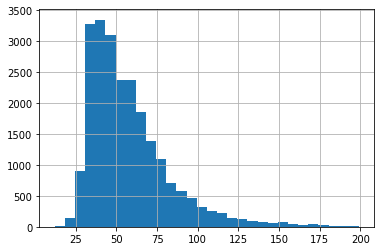

In [47]:
df['total_area'].hist(bins=30);

По гистограмме ниже видно, что большинство объявлений попадают в диапазон жилой площади около 50 м2


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Лучше выводы по проекту пиши в обычных markdown ячейках, а не в комментариях к коду
</div>

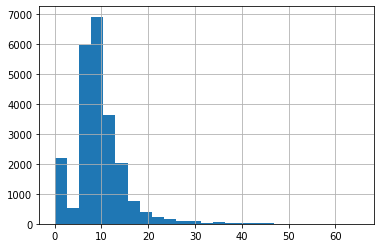

In [48]:
df['kitchen_area'].hist(bins=25);

5-15м2 площадь кухни в большинстве случаев выборки


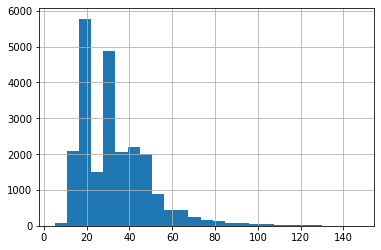

In [49]:
df['living_area'].hist(bins=25);

Наиболее часто встречающаяся жилая площадь - до 50м2


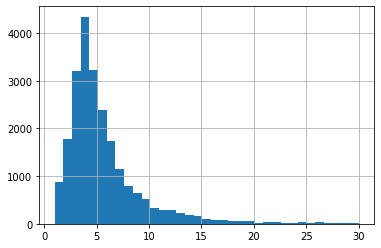

In [50]:
#ниже по графику видно, что...большинство объявлений находится на отметке до 25млн, что, наверное,
#логично (хотя мне этот график не очень нравится, особо полезного мне ничего не сообщает)
(df['last_price'] / 1000000).hist(range=(1,30), bins=35);

Теперь видится все по-другому. 3-6 млн - такой диапазон цен охватывает большинство объявлений в датасете.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут необходимо поиграться с параметрами bins и range, чтобы график стал более понятным. А если ещё все значения разделить на 1млн, то будет совсем хорошо)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Красота!
</div>

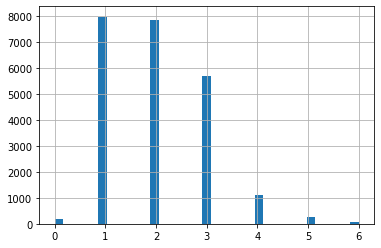

In [51]:
df['rooms'].hist(bins=35);

Однокомнатных и двухкмонатных квартир больше всего в выборке

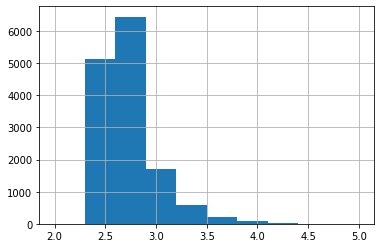

In [52]:

df['ceiling_height'].hist(range=(2,5));

Высота потолков до 2.75м

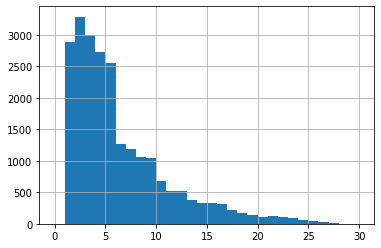

In [53]:
df['floor'].hist(range=(0, 30), bins=30);

Частотное распределение этажей продаваемых квартир (в основной массе с 1 по 5) 


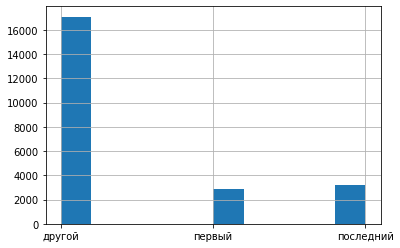

In [54]:
#кажется, что тут особо нечего комментировать
df['type_floor'].hist();

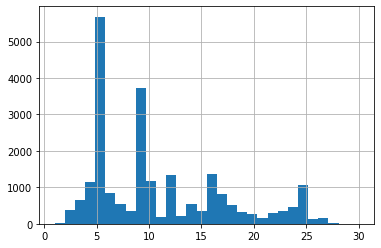

In [55]:
df['floors_total'].hist(range=(1,30), bins=30);

Пятиэтажек больше всего в выборке, а следом 9-ти этажные дома.

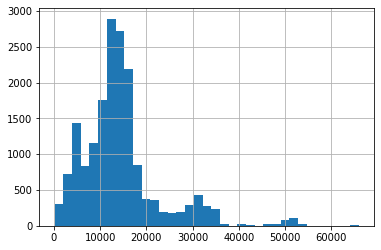

In [56]:
df['cityCenters_nearest'].hist(bins=35);

Наибольшее количество значений удаленности от центра города лежит в диапазоне от 10-15км


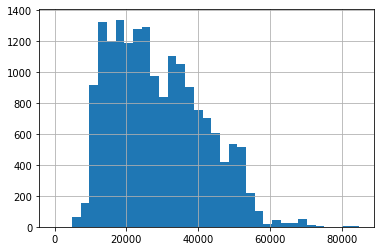

In [57]:
df['airports_nearest'].hist(bins=35);

По графику ниже видно - ожидать, что аэропорт окажется на расстоянии меньше 15км от жилья
не приходится, но может оно и к лучшему, я, к примеру, живу в 7 км от аэропорта, и не могу сказать,
что мне это сильно нравится

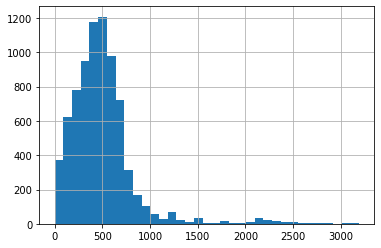

In [58]:
df['parks_nearest'].hist(bins=35);

Немного перефразируя фразу из одного известного сериала - парки близко. А вообще очень неплохо когда
до парка не сильно больше 500м.

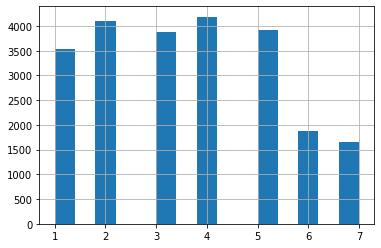

In [59]:
df['ad_day'].hist(bins=15);

В выходные объявления подавали меньше чем в рабочие дни

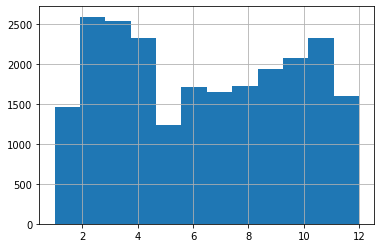

In [60]:
df['ad_month'].hist(bins=12);

Заметен нисходящий тренд по подаче объявлений с февраля по март, небольшой всплеск 
в июне и восходящий тренд с июля по ноябрь. Декабрь, январь и май  - рынок, по всей видимости 
немного замирает (праздники все-таки)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

In [61]:
df['days_exposition'].describe()

count    20109.000000
mean       179.092745
std        218.003639
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

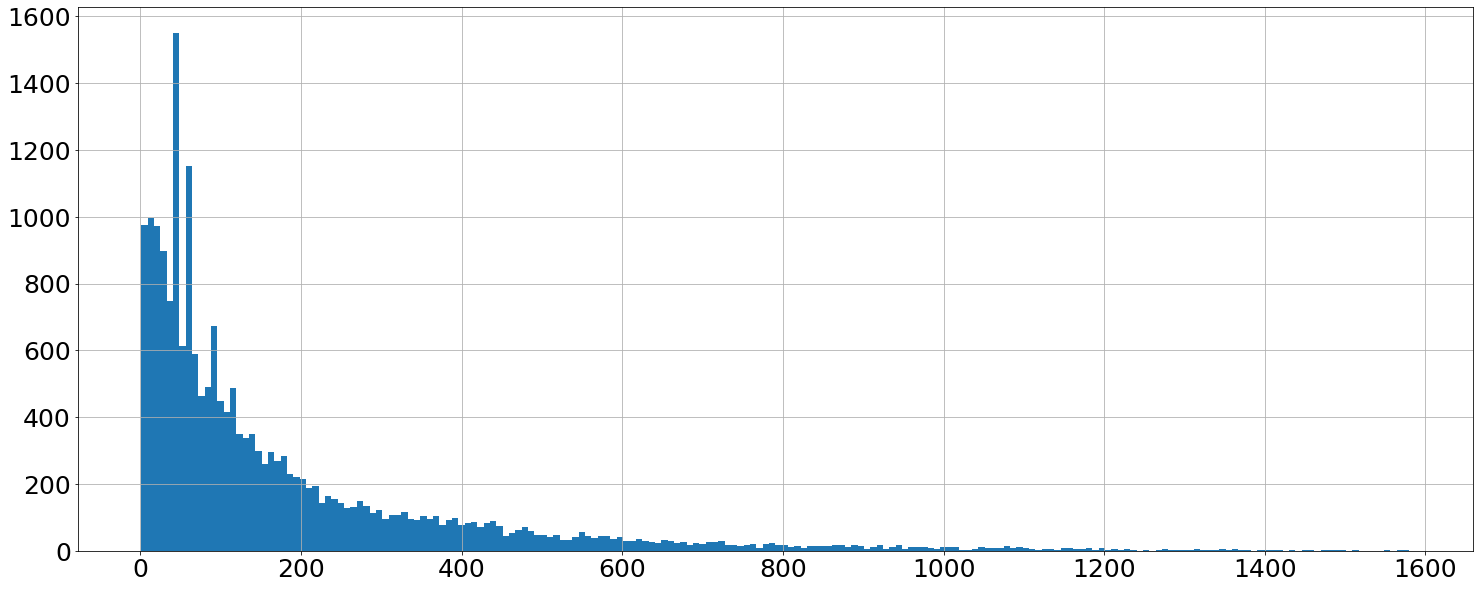

In [62]:
df['days_exposition'].hist(bins=200, figsize=(25,10), xlabelsize=25, ylabelsize=25);

<AxesSubplot:>

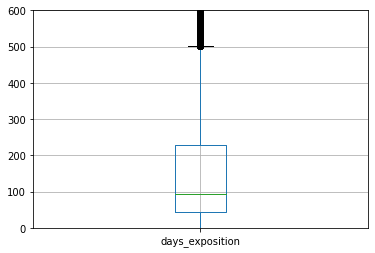

In [63]:
plt.ylim(0, 600)
df.boxplot(column='days_exposition')

#### В среднем квартиры продавались примерно 181 день, по медианому значению за 95. Аномально долгие продажи - свыше 500 дней. Быстрыми продажами я бы назвал продажи из первого квантиля - до 45 дней.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

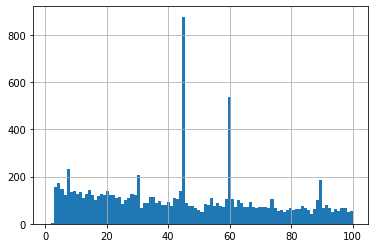

In [64]:
df[df['days_exposition'] <= 100]['days_exposition'].hist(bins=100);

Честно говоря особо никаких мыслей насчет этих пиков не приходит в голову. Сильные всплески происходят примерно на 45 и 60 днях. Возможно это связано с самой площадкой для размещения объявлений, где есть какие-то определенные конечные периоды размещения самого объявления и нужны действия от пользователя для его продления.

In [65]:
df[df['days_exposition'] <= 100]['last_price']

1        3350000.0
5        2890000.0
11       3300000.0
12       3890000.0
15       4650000.0
           ...    
23525    3200000.0
23526    9200000.0
23527    3550000.0
23528    5500000.0
23533    3100000.0
Name: last_price, Length: 10413, dtype: float64

In [66]:
#разобью  выборку на 15 ценовых групп
df['last_price_q'] = pd.qcut(df['last_price'], 15, duplicates='drop')

In [67]:
#сводная по 15-ти ценовым группам
df.groupby('last_price_q')['days_exposition'].agg(['count', 'mean', 'median', max, min])

,count,mean,median,max,min
last_price_q,,,,,
"(429999.999, 2100000.0]",1314,170.207763,91.5,1396.0,3.0
"(2100000.0, 2750000.0]",1420,162.947183,85.5,1375.0,3.0
"(2750000.0, 3150000.0]",1387,157.403028,84.0,1231.0,3.0
"(3150000.0, 3500000.0]",1612,166.818238,82.0,1580.0,3.0
"(3500000.0, 3790000.0]",1213,149.423743,74.0,1368.0,3.0
"(3790000.0, 4100000.0]",1560,155.373718,82.5,1314.0,1.0
"(4100000.0, 4430000.0]",1286,165.074650,86.0,1512.0,3.0
"(4430000.0, 4800000.0]",1508,156.349469,85.0,1346.0,3.0
"(4800000.0, 5200000.0]",1275,175.165490,92.0,1315.0,3.0


<AxesSubplot:xlabel='last_price_q'>

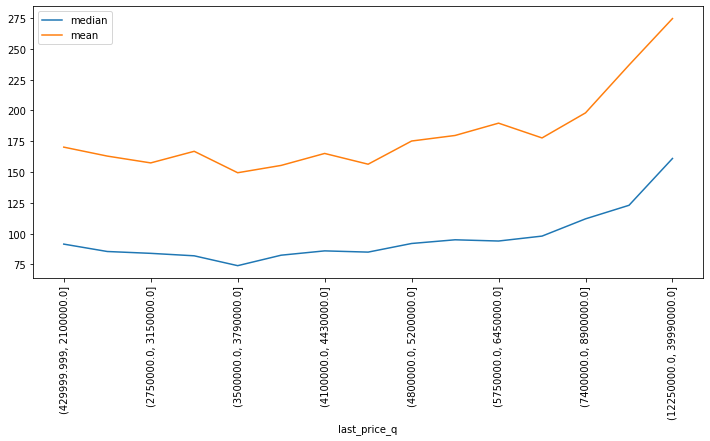

In [68]:
# на графике видно, что медианное и средее значения растут с увеличением стоимости. 
#Небольшое снижение в районе 3.5млн-3.8млн по медианному значению связано, вероятно
#с большей ликвидностью этой группы жилья
df.groupby('last_price_q')['days_exposition']\
.agg(['count', 'mean', 'median', max, min]).plot(y=['median', 'mean'], rot=90, figsize=(12, 5))

<AxesSubplot:xlabel='last_price_q'>

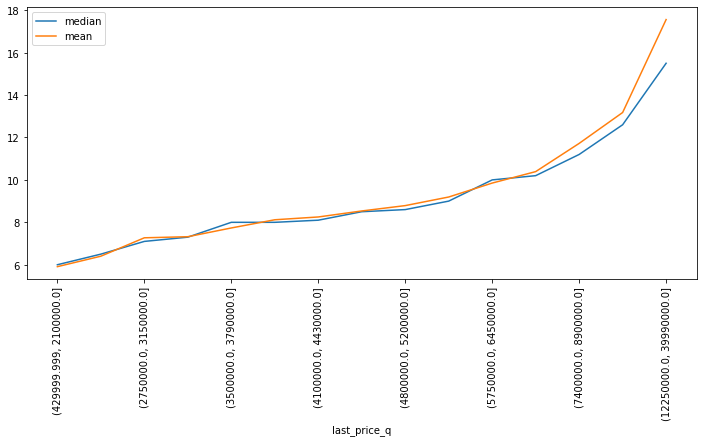

In [69]:
#чем больше стоимость квартиры тем больше площадь кухни
df.groupby('last_price_q')['kitchen_area']\
.agg(['count', 'mean', 'median', max, min]).plot(y=['median', 'mean'], rot=90, figsize=(12, 5))

<AxesSubplot:xlabel='last_price_q'>

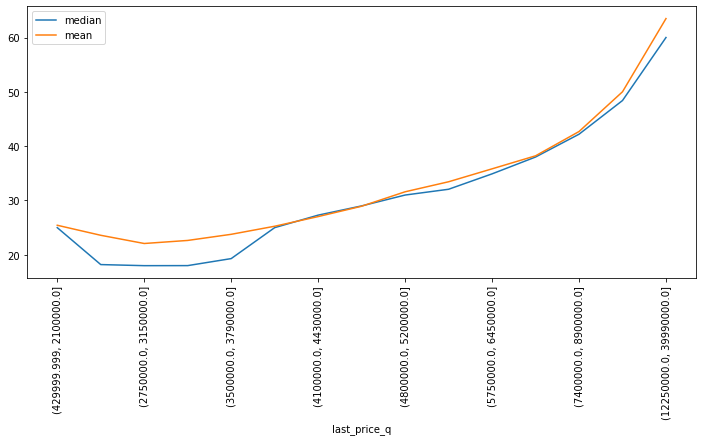

In [70]:
#чем больше стоимость квартиры тем больше жилая площадь квартиры
df.groupby('last_price_q')['living_area']\
.agg(['count', 'mean', 'median', max, min]).plot(y=['median', 'mean'], rot=90, figsize=(12, 5))

<AxesSubplot:xlabel='last_price_q'>

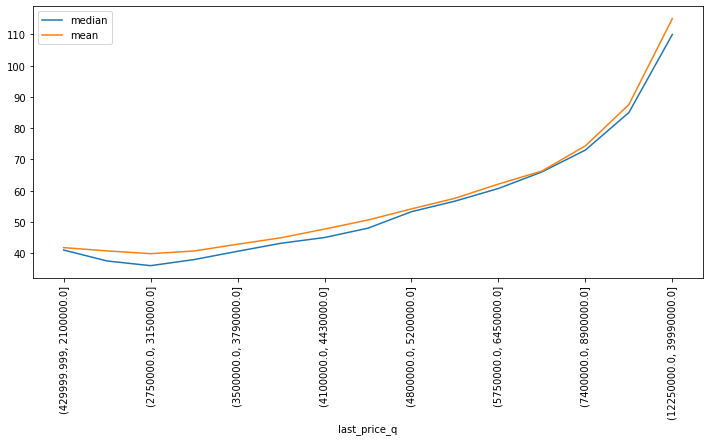

In [71]:
##чем больше стоимость квартиры тем больше в принципе площадь квартиры
df.groupby('last_price_q')['total_area']\
.agg(['count', 'mean', 'median', max, min]).plot(y=['median', 'mean'], rot=90, figsize=(12, 5))

<AxesSubplot:xlabel='last_price_q'>

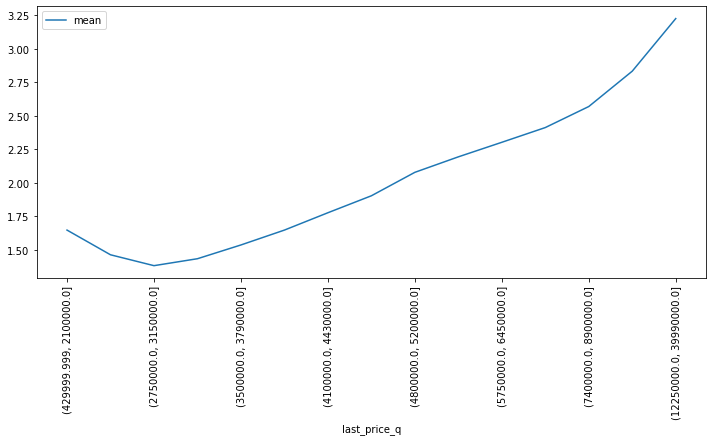

In [72]:
# и больше комнат
df.groupby('last_price_q')['rooms']\
.agg(['count', 'mean', 'median', max, min]).plot(y=['mean'], rot=90, figsize=(12, 5))

In [73]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_one_sq_m', 'ad_day',
       'ad_month', 'ad_year', 'type_floor', 'cityCenters_nearest_km',
       'last_price_q'],
      dtype='object')

<AxesSubplot:xlabel='type_floor'>

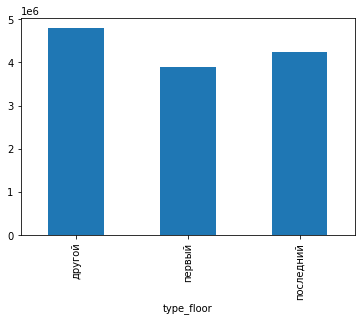

In [74]:
#по графику видно, что медианная стоимость первого и последнего этажей ниже чем других.
df.groupby('type_floor')['last_price'].median().plot(kind='bar')

In [75]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_one_sq_m', 'ad_day',
       'ad_month', 'ad_year', 'type_floor', 'cityCenters_nearest_km',
       'last_price_q'],
      dtype='object')

<AxesSubplot:xlabel='ad_day'>

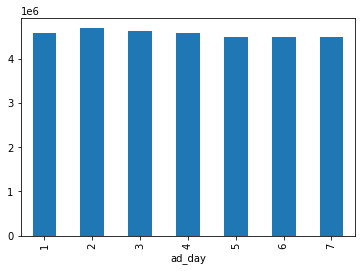

In [76]:
#по этому выводу складывается впечатление, что абсолютно без разницы в какой день
#было выложено объявление. У богатых и не очень нет предпочтения в какой день подавать
#объявление
df.groupby('ad_day')['last_price'].median().plot(kind='bar')

<AxesSubplot:xlabel='ad_month'>

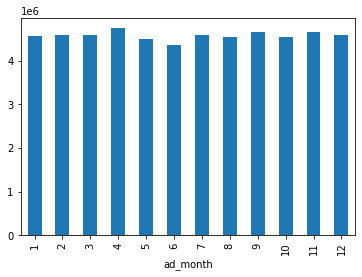

In [77]:
# Здесь похожая ситуация на группировку по дням
df.groupby('ad_month')['last_price'].median().plot(kind='bar')

<AxesSubplot:xlabel='ad_year'>

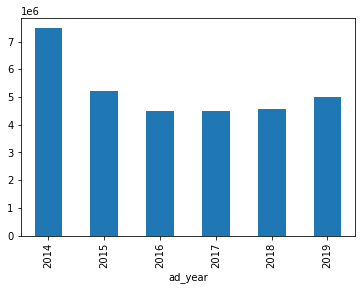

In [78]:
#Наиболее высокая медианная цена за квартиру наблюдалась в 2014г - около 7.7млн руб., далее снижалась
#до 2016 - до 4.5мл и к 19 году добралась до отметки 5млн 
df.groupby('ad_year')['last_price'].median().plot(kind='bar')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё добавим расчет корреляции для общей площади, жилой площади, площади кухни и количества комнат используя .corr()
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>А давай! 🙂
</div>

In [79]:
df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.773320,0.636075,0.495385,0.474293
total_area,0.773320,1.000000,0.908701,0.480226,0.788695
living_area,0.636075,0.908701,1.000000,0.277946,0.880692
kitchen_area,0.495385,0.480226,0.277946,1.000000,0.189915
rooms,0.474293,0.788695,0.880692,0.189915,1.000000


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>А с чем корреляцию то смотрим?) 😄 Самый главный столбец забыл добавить
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Согласен🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Красивое)
</div>

Линейная связь  цены ярче всего выражена с общей площадью и в меньшей степени с показателем количества комнат.

In [80]:
#средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
top10_city_price_sq_m = (df.groupby('locality_name')['price_one_sq_m']
 .agg(['count','mean']).sort_values(by='count',ascending=False).head(10))
top10_city_price_sq_m

,count,mean
locality_name,,
Санкт-Петербург,15303,111623.410703
Мурино,585,86015.025069
Кудрово,469,95261.963450
посёлок Шушары,439,78551.344545
Всеволожск,397,68719.320400
Пушкин,364,103122.538840
Колпино,337,75333.295801
посёлок Парголово,326,90332.263023
Гатчина,307,68746.146763


In [81]:
top10_city_price_sq_m['mean'].head(1)

locality_name
Санкт-Петербург    111623.410703
Name: mean, dtype: float64

Cамая высокая цена за кв.м. в списке топ-10 - г. Санкт-Петербург - 114795.4

In [82]:
top10_city_price_sq_m['mean'].tail(1)

locality_name
Выборг    58238.143141
Name: mean, dtype: float64

Cамая низкая цена за кв.м. в списке топ-10 - г. Выборг - 58238.1

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут нужно выделить населённые пункты с максимальной и минимальной ценой из того списка топ10 что ты выводишь выше
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Всё верно! Как вариант, тут вместо таблицы можно построить гистограмму, так будет более наглядно)
</div>

<AxesSubplot:xlabel='cityCenters_nearest_km'>

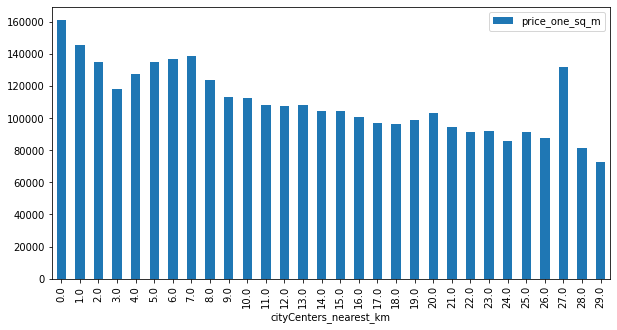

In [83]:
(df[df['locality_name'] == 'Санкт-Петербург']
 .pivot_table(index='cityCenters_nearest_km', values='price_one_sq_m', aggfunc='mean')
 .plot(figsize=(10, 5), kind='bar'))

Надеюсь я правильно понял и вывод выше соответствует тому, что от меня ожидалось

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь нужно рассчитать стоимость квадратного метра для каждого километра удаляясь от центра. Для этого лучше всего построить сводную таблицу. В index передай расстояние до центра в км, а в values цену за квадратный метр. Можно сравнить среднее значение и медианное
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Абсолюно верно)
</div>

### Общий вывод 
#### Проведя анализ данных выяснилось что (далее по пунктам):
1. Большинство объявлений попадают в диапазон жилой площади около 50 м2 - более 11 тыс. объявлений;
2. Площадь кухни 5-15м2 в большинстве случаев выборки - около 18 тыс. объявлений;
3. Наиболее часто встречающаяся жилая площадь - до 50м2 - порядка 21тыс. объявлений;
4. 3-6 млн рублей - такой диапазон цен охватывает большинство объявлений в датасете.
5. Частота появления объявлений по количеству  комнат - 1-комнатных - около 8тыс, 2-комнатных - около 7.9 тыс., 3-комнатных - около 5.9 тыс.;
6. Высота потолков в продаваемых квартирах в большинстве объявлений до 2.7м.;
7. Большинство квартир находятся на этажах  с 1 по 5.;
8. Квартиры продаются в основном в пятиэтажных домах (около 6.8тыс объявлений) и в девятиэтажных домах (примерно 4.1 тыс. объявлений);
9. Наибольшее количество значений удаленности от центра города лежит в диапазоне от 10-15км - около 8 тыс. объявлений;
10. Большая часть продаваемых квартир удалена от ближайшего аэропорта на расстояние от 15 км;
11. Удаленность продаваемой недвижимости от парков в большинстве случаев не превышает 500 м.
12. В выходные объявления подаются реже чем в рабочие дни (более чем в два раза);
13. Заметен нисходящий тренд по подаче объявлений с февраля по март, небольшой всплеск в июне и восходящий тренд с июля по ноябрь. Декабрь, январь и май  - рынок, по всей видимости немного замирает;
14. В среднем квартиры продавались примерно 181 день, по медианому значению за 95. Аномально долгие продажи - свыше 500 дней. Быстрые продажи  - до 45 дней.
15. Медианная стоимость квартир, расположенных на первом этаже составляет 3.9 млн руб., квартир, расположенных на последнем этаже - 4.3 млн, а квартир , расположенных ни на первом, ни на последнем - 4.85.
16. Медианная стоимость за квартиру наблюдалась в 2014г - около 7.7млн руб., далее снижалась к 2016 - до 4.5мл, а  к 2019 году немного подросла и добралась до отметки 5млн;
17. Самая высокая средняя цена за кв.м. в списке самых частотных городов по поданным объявлениям в г. Санкт-Петербург  - 114795.4 руб.;
18. Самая низкая средняя цена за кв.м. в списке самых частотных городов по поданным объявлениям в г. Выборг  - 58238.1 руб.;



<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- написать короткий вывод после первичного просмотра данных
<br>- изменить тип данных в столбце balcony
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- поправить график для цены
<br>- добавить расчет корреляции
<br>- корректно рассчитать стоимость каждого километра в последнем шаге
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Остались три правки:
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- добавить расчет корреляции
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод